# Prediccion del precio del Oro

Lucho Mar|2021 

Ca Ira by Joyce Jonathan

### About dataset

| Columna   | Tipo de Dato | Descripción |
|-----------|--------------|-------------|
| `Date`    | `object`     | Fecha de la observación (probablemente en formato string). |
| `SPX`     | `float64`    | Valor del índice bursátil **S&P 500**, representando el mercado accionario de EE.UU. |
| `GLD`     | `float64`    | Precio del ETF que sigue el valor del **oro**. |
| `USO`     | `float64`    | Precio del ETF que sigue el valor del **petróleo crudo (WTI)**. |
| `SLV`     | `float64`    | Precio del ETF que sigue el valor de la **plata**. |
| `EUR/USD` | `float64`    | Tipo de cambio del **euro frente al dólar estadounidense**. |

### Import Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Import Data & Data Processing

In [2]:
df = pd.read_csv(r"gld_price_data.csv")
df_raw = df.copy()
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Axes: >

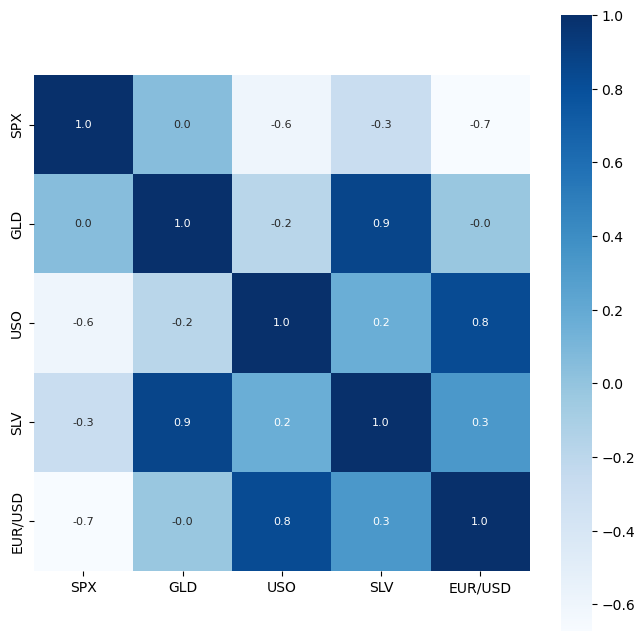

In [6]:
#Creacion de correlacion de pearson

correlation = df.drop(columns=['Date']).corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [7]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

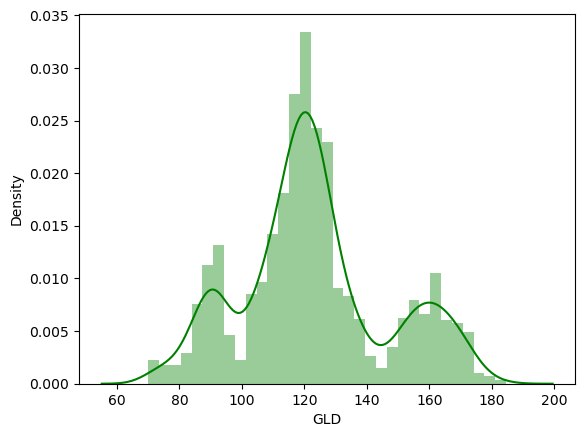

In [8]:
# Ver la distrubucion del oro
sns.distplot(df['GLD'],color='green')

### Desarrollo

In [9]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [10]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [11]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [13]:
regressor = RandomForestRegressor(n_estimators=100)

In [14]:
#Entrenamiento
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [15]:
test_data_prediction = regressor.predict(X_test)

In [16]:
print(test_data_prediction)

[168.65619921  81.49669986 115.73700001 127.62550083 120.61010118
 154.59999835 150.28379831 126.17440026 117.4683987  125.9899005
 116.472701   172.12190061 141.88799828 168.07919831 115.09650002
 117.59520026 138.61810334 169.99510094 158.63290232 155.63099919
 155.19810033 125.25310035 175.76420024 156.71370302 125.17350023
  93.80439959  77.39020023 120.66600014 119.14079972 167.61849912
  88.07530062 125.23929987  91.00510081 117.62900045 121.21619949
 136.30110113 115.66930115 114.99880091 145.83099979 107.18540058
 104.57850255  87.18549784 126.45730045 118.07640043 152.63499846
 119.83679968 108.40469964 107.99259808  93.12970055 127.16939755
  74.81690041 113.75379938 121.56200012 111.26819944 118.85999896
 120.50759947 159.02570016 168.56990113 146.71679671  85.98039844
  94.27790041  86.86839875  90.37920058 119.01610083 126.53290038
 127.47869995 169.93390051 122.2194993  117.26829908  98.53200015
 168.56090121 142.72389868 131.38100209 121.02840208 121.11589934
 120.113400

In [17]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891374384882916


In [18]:
Y_test = list(Y_test)

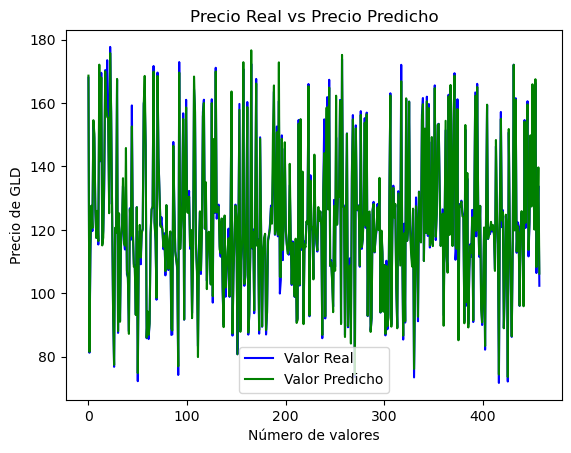

In [19]:
plt.plot(Y_test, color='blue', label='Valor Real')
plt.plot(test_data_prediction, color='green', label='Valor Predicho')
plt.title('Precio Real vs Precio Predicho')
plt.xlabel('Número de valores')
plt.ylabel('Precio de GLD')
plt.legend()
plt.show()